In [10]:
%matplotlib notebook
import os, sys
# import numpy as np
# import matplotlib.pyplot as plt
# import itertools
# from tqdm import tqdm
sys.path.append('/root/cAAE')

# import torch.nn as nn
# import torch
# from torch.autograd import Variable
# from torch.utils.tensorboard import SummaryWriter

from model.tools.config import Config, read_conf
from model.generator import generator, net
# from model.train import train
# from model.test import test, test_show

# from matplotlib import pyplot
# from sklearn.metrics import roc_curve, roc_auc_score


config = read_conf(f'/root/cAAE/config/{os.environ["CONFIG_NAME"]}.json')

Первым делом получим датасет для теста. Регулируя `config.test.max_batch` получим

In [12]:
config.test


_______
'metric': 'sd'
'acc': 0.3
'bound': 0.6
'tumor_min': 30
'thickness': 2
'type': 'HGG'
'batch_size': 1
'max_batch': 100
_______

In [11]:
config.test.max_batch
dataset = generator(config, train_flg=False)
config.transforms += {'img_shape': dataset.get_img_shape()}

In [21]:
config.struct.name = 'ResDCGAN'
# config.struct.name = 'AAE'
config.test.thickness = 0
model = net[config.struct.name](config, train_flg=False)
# model.config.test.thickness = 0
load_path = '/root/weights'
model.load(load_path)

[Cuda: True]


In [22]:
target, result = model.calc_metric_all(dataset, acc=0.3)#, bound=0.5)

Testing: 100%|██████████| 5/5 [00:50<00:00, 10.00s/it]


In [23]:
# config.struct.name = 'ResDCGAN'
config.struct.name = 'AAE'
# config.test.thickness = 0
model = net[config.struct.name](config, train_flg=False)
load_path = '/root/weights'
model.load(load_path)
target2, result2 = model.calc_metric_all(dataset, acc=0.3)#, bound=0.5)

Testing:   0%|          | 0/5 [00:00<?, ?it/s]

[Cuda: True]


Testing: 100%|██████████| 5/5 [00:49<00:00,  9.86s/it]


<IPython.core.display.Javascript object>


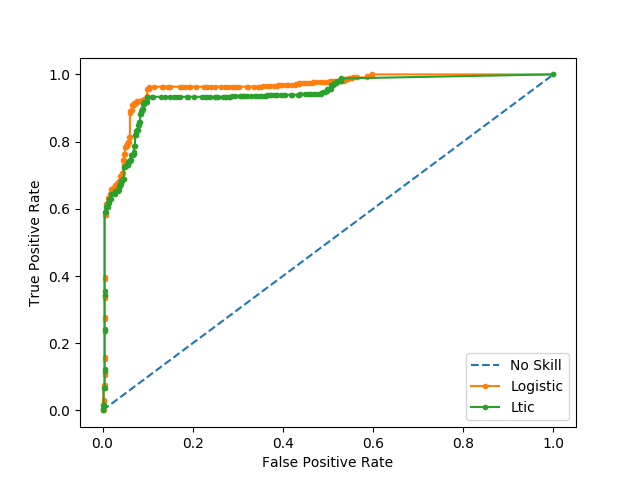

In [24]:
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
tpr, fpr, _ = roc_curve(result.cpu(), target.cpu())
pyplot.plot(tpr, fpr, marker='.', label='ResDCGAN')

tpr, fpr, _ = roc_curve(result2.cpu(), target2.cpu())
pyplot.plot(tpr, fpr, marker='.', label='AAE')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [27]:
roc_auc_score(result.cpu(), target.cpu()), roc_auc_score(result2.cpu(), target2.cpu())

(0.9606911814776983, 0.9419748042219953)